## Hello Pandas

* Pandas is library for working with tabular data
* Supports many formats (CSV, Excel, JSON, parquet, HTML, ...)
* Quick path from data to visualization
* Not the easiest to learn

In [1]:
import pandas as pd

### Series

In [2]:
s = pd.Series() # list of values

In [3]:
import random

In [4]:
vs = [random.randint(0, 100) for i in range(100)]

In [5]:
s = pd.Series(vs)

In [6]:
s

0     75
1     33
2     68
3     35
4     52
      ..
95    35
96    83
97    50
98    49
99    42
Length: 100, dtype: int64

The index (first column) acts as a key to access rows. Column name to access columns (not yet given).

In [7]:
s.index

RangeIndex(start=0, stop=100, step=1)

In [8]:
s.name # name, or "column"

In [9]:
s.name = "tx"

In [10]:
s

0     75
1     33
2     68
3     35
4     52
      ..
95    35
96    83
97    50
98    49
99    42
Name: tx, Length: 100, dtype: int64

In [11]:
s[95] # access value by index 

35

In [12]:
s.min()

0

In [13]:
s.max()

100

In [14]:
s.describe()

count    100.00000
mean      51.90000
std       28.05352
min        0.00000
25%       35.00000
50%       51.50000
75%       72.25000
max      100.00000
Name: tx, dtype: float64

<Axes: >

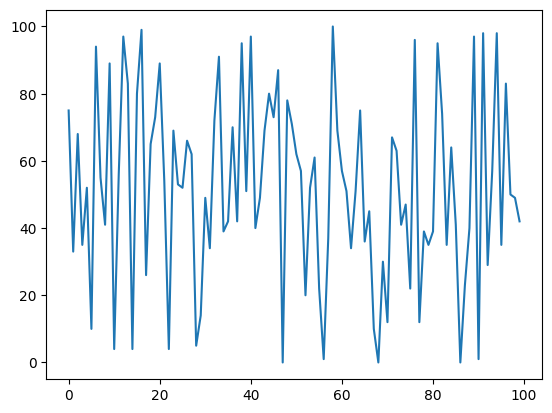

In [15]:
s.plot() # x: index, y: value

Various index types:

* RangeIndex: Index implementing a monotonic integer range.
* CategoricalIndex: Index of Categorical s.
* MultiIndex: A multi-level, or hierarchical Index.
* IntervalIndex: An Index of Interval s.
* DatetimeIndex: Index of datetime64 data.
* TimedeltaIndex: Index of timedelta64 data.
* PeriodIndex: Index of Period data.


In [16]:
pd.date_range(start="2024-01-01", end="2024-03-01", freq="D")

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

## DataFrame

In [29]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/Deutsche_Telekom")

In [30]:
len(dfs)

13

In [31]:
df = dfs[3]

In [32]:
df

,Year,Revenue (€ bn),Net income (€ bn),Total assets (€ bn),Employees
0,2011,58.6,0.55,122,240369
1,2012,58.1,–5.2,107,232342
2,2013,60.1,0.93,118,230000
3,2014,62.6,2.9,129,228248
4,2015,69.2,3.2,143,266232
5,2016,73.0,2.6,148,221000
6,2017,74.9,3.4,141,216000
7,2018,75.6,2.1,145,216369
8,2019,80.5,3.8,170,212846
9,2020,100.0,4.1,264,226291


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 12 non-null     int64  
 1   Revenue (€ bn)       12 non-null     float64
 2   Net income (€ bn)    12 non-null     object 
 3   Total assets (€ bn)  12 non-null     int64  
 4   Employees            12 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 608.0+ bytes


In [34]:
df["Net income (€ bn)"] = df["Net income (€ bn)"].str.replace("–", "-").astype(float)

In [35]:
df

,Year,Revenue (€ bn),Net income (€ bn),Total assets (€ bn),Employees
0,2011,58.6,0.55,122,240369
1,2012,58.1,-5.20,107,232342
2,2013,60.1,0.93,118,230000
3,2014,62.6,2.90,129,228248
4,2015,69.2,3.20,143,266232
5,2016,73.0,2.60,148,221000
6,2017,74.9,3.40,141,216000
7,2018,75.6,2.10,145,216369
8,2019,80.5,3.80,170,212846
9,2020,100.0,4.10,264,226291


In [36]:
cleaned = df.set_index("Year")

<Axes: xlabel='Year'>

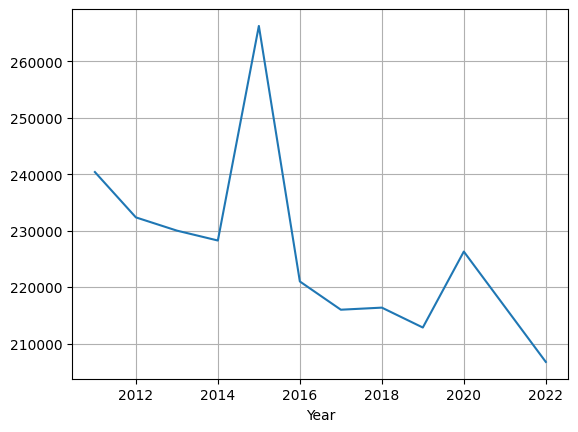

In [37]:
cleaned["Employees"].plot(grid=True)

<Axes: xlabel='Year'>

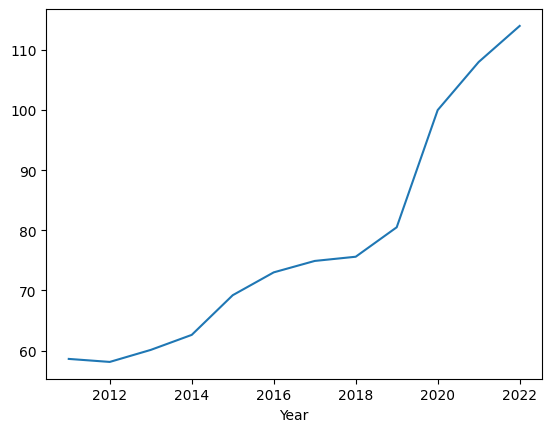

In [38]:
cleaned["Revenue (€ bn)"].plot()

In [39]:
df["Revenue (€ bn)"] * 1_000_000_000 / df["Employees"]

0     243791.836718
1     250062.408002
2     261304.347826
3     274263.082261
4     259923.675591
5     330316.742081
6     346759.259259
7     349403.103032
8     378207.718256
9     441908.869553
10    498780.758147
11    551366.566873
dtype: float64

<Axes: >

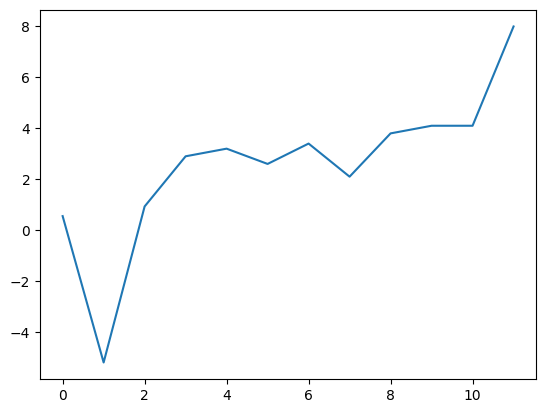

In [40]:
df["Net income (€ bn)"].plot()

In [41]:
df["Net income (€ bn)"] * 1_000_000_000 / df["Employees"]

0      2288.148638
1    -22380.800716
2      4043.478261
3     12705.478252
4     12019.591935
5     11764.705882
6     15740.740741
7      9705.641751
8     17853.283595
9     18118.263652
10    18935.195448
11    38692.390658
dtype: float64